In [5]:
import pathlib
import cv2
import imagej
import skimage
import matplotlib.pyplot as plt
import numpy as np
from IPython.utils.io import capture_output
import warnings
import PyBaSiC.pybasic as pybasic
from processor import BasicpyPreprocessor
from PIL import Image

In [12]:
fiji_path = pathlib.Path("/home/keenanmanpearl/Desktop/mitocheck/fiji-linux64/Fiji.app")
movie_path = pathlib.Path(
    "/home/keenanmanpearl/Desktop/mitocheck_movies/movies/LT0001_02/1.ch5/00001_01.ch5"
)
fiji = BasicpyPreprocessor(fiji_path)
movie = fiji.load_mitocheck_movie_data(movie_path)
corrected_movie = fiji.pybasic_illumination_correction(movie)


CellH5Reader initializing /home/keenanmanpearl/Desktop/mitocheck_movies/movies/LT0001_02/1.ch5/00001_01.ch5
Plate :/sample/0/plate/
Well :/sample/0/plate/LT0001_02--ex2005_11_16--sp2005_02_17--tt17--c3/experiment/
Site :/sample/0/plate/LT0001_02--ex2005_11_16--sp2005_02_17--tt17--c3/experiment/00001/position/
Parse segmentation ROIs for cell object primary__test : 0


In [13]:

def process_movie(down_factor, height, width, save_path, fourcc, fps, frames, corrected_movie):
    down_height = int(height / down_factor)
    down_width = int(width / down_factor)
    down_points = (down_width, down_height)
    # False for black and white
    out = cv2.VideoWriter(f"{save_path}", fourcc, fps, down_points, False)
    corrected_array = []
    for frame in range(frames):
        corrected_image = corrected_movie[frame]
        # compress each frame
        resized_image = cv2.resize(corrected_image, down_points)
        out.write(resized_image)
        corrected_array.append(resized_image)
    corrected_array = np.asarray(corrected_array)
    out.release()
    return corrected_array

In [14]:
# height = 1024
height = len(corrected_movie[0])
# width = 1344
width = len(corrected_movie[0][0])
# dimensions for compressed images
# save corrected movie with the same name as original movie but updated extension
save_path = movie_path.with_suffix(".avi")
# compression type to write movie
fourcc = cv2.VideoWriter_fourcc(*"jpeg")
# frames per second
fps = 4

save_path = pathlib.Path(
    "/home/keenanmanpearl/Desktop/mitocheck_movies/movies/LT0001_02/1.ch5/00001_01_compression2.avi"
)
compressed2 = process_movie(2, height, width, save_path, fourcc, fps, 10, corrected_movie)

save_path = pathlib.Path(
    "/home/keenanmanpearl/Desktop/mitocheck_movies/movies/LT0001_01/2.ch5/00001_01_compression5.avi"
)
compressed5 = process_movie(5, height, width, save_path, fourcc, fps, 10, corrected_movie)

save_path = pathlib.Path(
    "/home/keenanmanpearl/Desktop/mitocheck_movies/movies/LT0001_02/1.ch5/00001_01_compression10.avi"
)
compressed10 = process_movie(10, height, width, save_path, fourcc, fps, 10, corrected_movie)

save_path = pathlib.Path(
    "/home/keenanmanpearl/Desktop/mitocheck_movies/movies/LT0001_02/1.ch5/00001_01_compression20.avi"
)
compressed20 = process_movie(20, height, width, save_path, fourcc, fps, 10, corrected_movie)

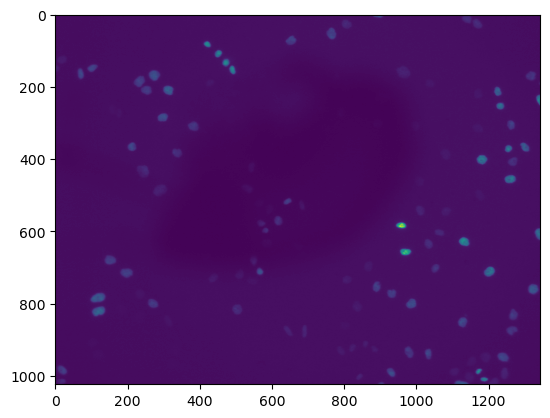

In [74]:
%matplotlib inline
uncorrected = plt.imshow(movie[1,:,:])


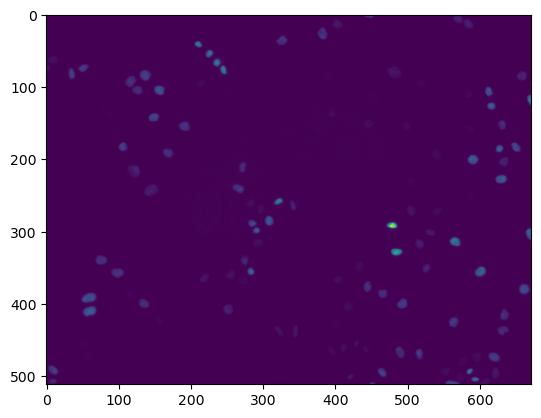

In [89]:
%matplotlib inline
compressed2_image = compressed2[1,:,:]
im2 = plt.imshow(compressed2_image)

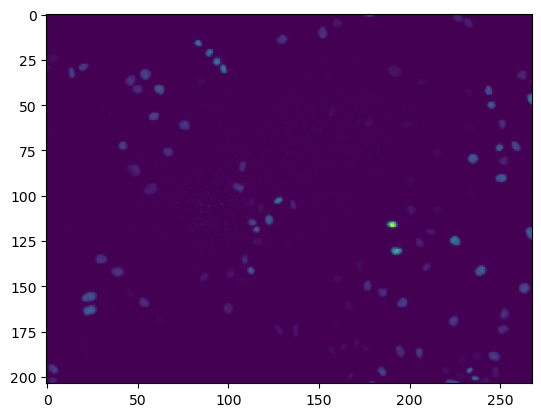

In [15]:
%matplotlib inline
compressed5_image = compressed5[1,:,:]
im2 = plt.imshow(compressed5_image)

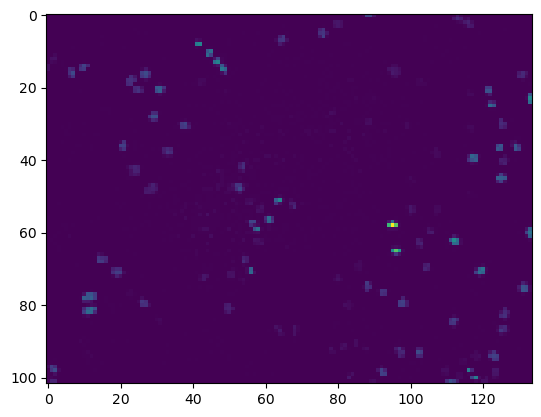

In [84]:
%matplotlib inline
compressed10_image = compressed10[1,:,:]
im10 = plt.imshow(compressed10_image)

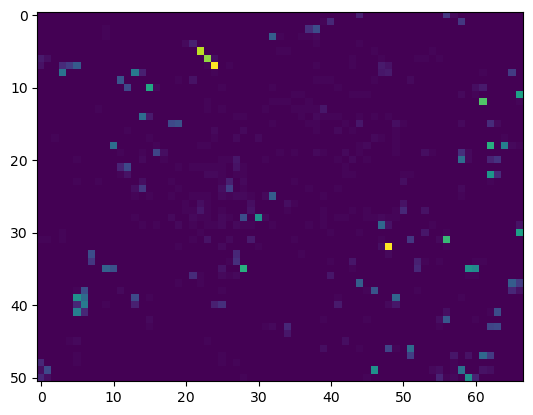

In [85]:
%matplotlib inline
compressed20_image = compressed20[1,:,:]
im20 = plt.imshow(compressed20_image)